In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
sys.path.insert(1, '/home/jw3514/Work/UNIMED/src')
from CellType_PSY import *
from UNIMED import *
import yaml
#import scanpy as sc
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()

os.chdir("/home/jw3514/Work/UNIMED/notebooks/")

with open("../config/config.yaml", "r") as f:
    config = yaml.safe_load(f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Try Drop top PSD correlated genes

In [7]:
PSD_corrDF = pd.read_csv("/home/jw3514/Work/UNIMED/dat/Pfactor/HumanCT_GenePSD_Correlation.csv", index_col=0)

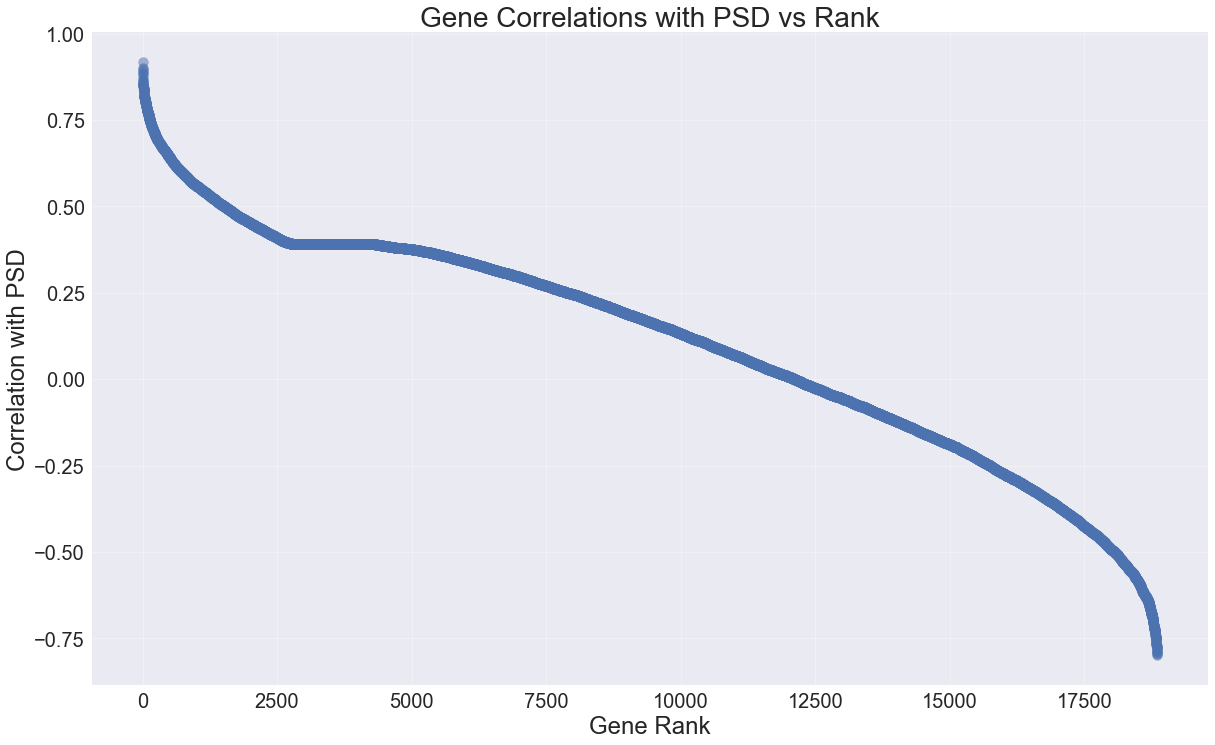

In [152]:
plt.figure(figsize=(20,12))
plt.scatter(range(len(PSD_corrDF)), PSD_corrDF['spearman_corr'], alpha=0.5, s=100)
plt.xlabel('Gene Rank', fontsize=24)
plt.ylabel('Correlation with PSD', fontsize=24)
plt.title('Gene Correlations with PSD vs Rank', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, alpha=0.3)

In [77]:
for N_Genes_Drop in topN_to_drop:
    top_psd_genes = PSD_corrDF.head(N_Genes_Drop).index.values

    genes_to_drop = [g for g in top_psd_genes if g in HumanCT_Z2_scores.index]
    Z2Mat = HumanCT_Z2_scores.copy().drop(genes_to_drop)
    genes_to_drop_DZ = [g for g in top_psd_genes if g in Psy_GWAS_DF["SCZ"].index]
    GWAS_DF = Psy_GWAS_DF["SCZ"].copy().drop(genes_to_drop_DZ)
    
    topN = 2000
    top_genes_by_ct = {col: Z2Mat[col].nlargest(topN).index.tolist() for col in Z2_Mat.columns}
    results = calculate_cluster_topGene_Enrichment(GWAS_DF["ZSTAT"], top_genes_by_ct, Anno, "HumanCT")
    results = results.set_index("ct_idx")
    results.to_csv("../dat/KillPSD/PSD/SCZ_DropTop_{}_HumanCT.csv".format(N_Genes_Drop))


In [81]:
corrs2 = []
for N_Genes_Drop in topN_to_drop:
    tmpDF = pd.read_csv("/home/jw3514/Work/UNIMED/dat/KillPSD/PSD/SCZ_DropTop_{}_HumanCT.csv".format(N_Genes_Drop), index_col="ct_idx")
    values1 = HumanCT_PSD.sort_index()["EFFECT"].values
    values2 = tmpDF.sort_index()["beta"].values
    corr = pearsonr(values2, values1)
    corrs2.append(corr[0])

In [83]:
tmpDF

,beta,pvalue,Class,Supercluster,Subtype,Neurotransmitter,Top three regions,Top three dissections,Number of cells,Neuropeptide auto-annotation
ct_idx,,,,,,,,,,
221,0.284259,8.304636e-07,NEUR,Medium spiny neuron,MSN-D2,GABA,"Basal forebrain: 78.8%, Amygdala: 9.0%, Cerebr...","Human SI: 19.8%, Human Pu: 16.4%, Human NAC: 1...",2571.0,CHGA CHGB NAMPT NUCB PENK SCG TAC UBL VGF proSAAS
141,0.281147,1.091926e-06,NEUR,Deep-layer intratelencephalic,NaN,VGLUT1 VGLUT2,"Cerebral cortex: 95.4%, Basal forebrain: 2.0%,...","Human MTG: 7.9%, Human Ig: 6.0%, Human TF: 5.7%",9992.0,CCK CHGA CHGB NAMPT NUCB PDYN SCG UBL VGF proSAAS
140,0.275175,1.838509e-06,NEUR,Deep-layer intratelencephalic,NaN,VGLUT1 VGLUT2,"Cerebral cortex: 99.2%, Hippocampus: 0.5%, Bas...","Human M1C: 11.6%, Human V1C: 8.4%, Human MTG: ...",12455.0,CBLN CCK CHGA CHGB NAMPT NUCB SCG UBL VGF proSAAS
133,0.264169,4.687463e-06,NEUR,Upper-layer intratelencephalic,NaN,VGLUT1 VGLUT2,"Cerebral cortex: 100.0%, Basal forebrain: 0.0%...","Human V1C: 62.9%, Human V2: 17.6%, Human Pro: ...",20086.0,ADCYAP CBLN CCK CHGA CHGB NAMPT NUCB SCG UBL V...
138,0.261192,5.966041e-06,NEUR,Upper-layer intratelencephalic,NaN,VGLUT1 VGLUT2,"Cerebral cortex: 96.4%, Basal forebrain: 1.2%,...","Human MTG: 14.3%, Human V2: 5.2%, Human A19: 4.5%",58263.0,CBLN CCK CHGA CHGB NAMPT NUCB SCG UBL VGF proSAAS
...,...,...,...,...,...,...,...,...,...,...
54,-0.024049,6.774170e-01,ASTRO,Astrocyte,NaN,NaN,"Cerebral cortex: 38.8%, Hippocampus: 33.1%, Am...","Human A35r: 18.3%, Human CA1: 15.4%, Human Sub...",24168.0,AGT NUCB
30,-0.031207,5.894450e-01,CHRP,Fibroblast,ARACH,NaN,"Cerebral cortex: 35.3%, Basal forebrain: 29.7%...","Human SEP: 29.0%, Human A35r: 21.2%, Human MN:...",283.0,IGF
76,-0.055979,3.327162e-01,CHRP EPEN OLIGO,Choroid plexus,NaN,NaN,"Basal forebrain: 55.4%, Medulla: 31.7%, Thalam...","Human SEP: 55.4%, Human MoSR: 23.8%, Human Pul...",101.0,NAMPT NUCB UBL proSAAS


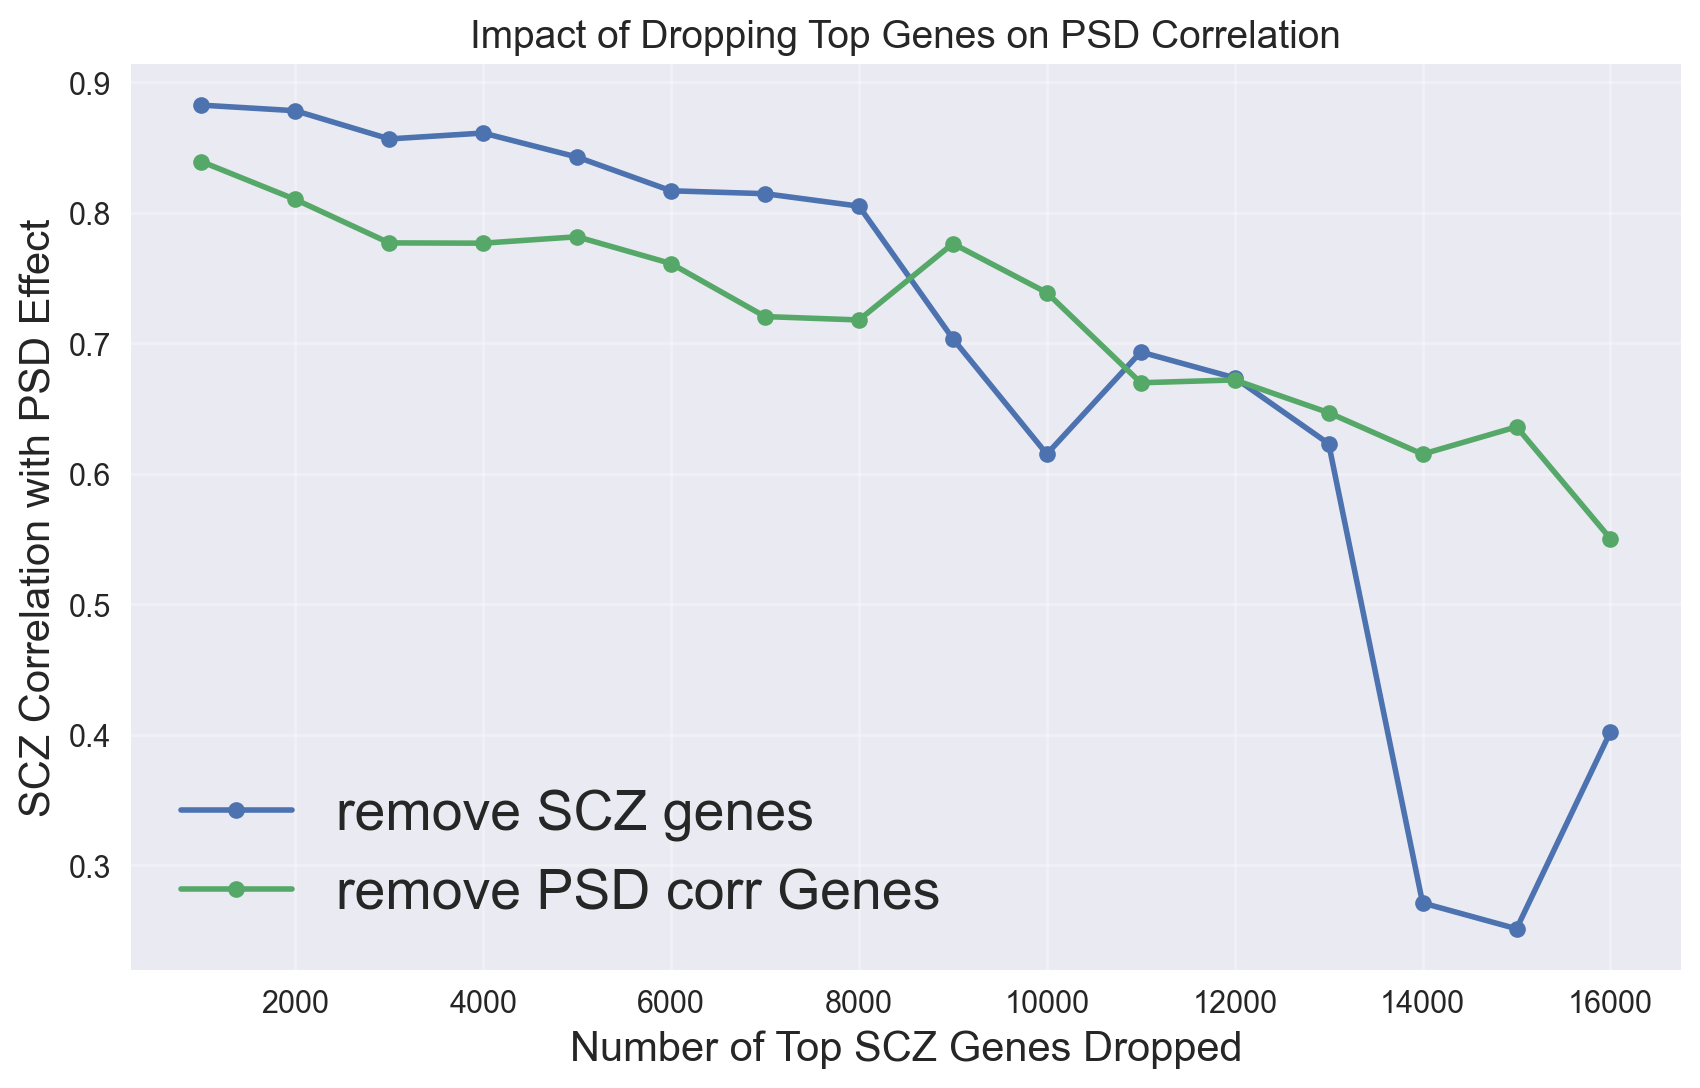

In [82]:
plt.figure(figsize=(10,6), dpi=200)
plt.plot(topN_to_drop, corrs, marker='o', linewidth=2, markersize=6, label="remove SCZ genes")
plt.plot(topN_to_drop, corrs2, marker='o', linewidth=2, markersize=6, label="remove PSD corr Genes")
plt.xlabel('Number of Top SCZ Genes Dropped', fontsize=15)
plt.ylabel('SCZ Correlation with PSD Effect', fontsize=15)
plt.title('Impact of Dropping Top Genes on PSD Correlation', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)

#### Remove by constrant

In [86]:
LOEUF_RankingDF = pd.read_csv("/home/jw3514/Work/UNIMED/dat/LOEUF_Rankings.csv", index_col="EntrezID")

In [87]:
LOEUF_RankingDF

,GeneSymbol,LOEUF,ExACpLI,sHet
EntrezID,,,,
9969,MED13,0.030,1.000000e+00,0.608889
25836,NIPBL,0.032,1.000000e+00,0.573090
9126,SMC3,0.037,1.000000e+00,0.586268
23019,CNOT1,0.038,1.000000e+00,0.330130
6018,RLF,0.040,1.000000e+00,0.547053
...,...,...,...,...
79097,TRIM48,1.985,1.773400e-14,NaN
5669,PSG1,1.986,3.441300e-12,NaN
8216,LZTR1,1.994,3.383200e-52,NaN


In [88]:
for N_Genes_Drop in topN_to_drop:
    top_genes = LOEUF_RankingDF.head(N_Genes_Drop).index.values

    genes_to_drop = [g for g in top_genes if g in HumanCT_Z2_scores.index]
    Z2Mat = HumanCT_Z2_scores.copy().drop(genes_to_drop)
    genes_to_drop_DZ = [g for g in top_genes if g in Psy_GWAS_DF["SCZ"].index]
    GWAS_DF = Psy_GWAS_DF["SCZ"].copy().drop(genes_to_drop_DZ)
    
    topN = 2000
    top_genes_by_ct = {col: Z2Mat[col].nlargest(topN).index.tolist() for col in Z2_Mat.columns}
    results = calculate_cluster_topGene_Enrichment(GWAS_DF["ZSTAT"], top_genes_by_ct, Anno, "HumanCT")
    results = results.set_index("ct_idx")
    results.to_csv("../dat/KillPSD/LOEUF/SCZ_DropTop_{}_HumanCT.csv".format(N_Genes_Drop))


In [89]:
corrs3 = []
for N_Genes_Drop in topN_to_drop:
    tmpDF = pd.read_csv("/home/jw3514/Work/UNIMED/dat/KillPSD/LOEUF/SCZ_DropTop_{}_HumanCT.csv".format(N_Genes_Drop), index_col="ct_idx")
    values1 = HumanCT_PSD.sort_index()["EFFECT"].values
    values2 = tmpDF.sort_index()["beta"].values
    corr = pearsonr(values2, values1)
    corrs3.append(corr[0])

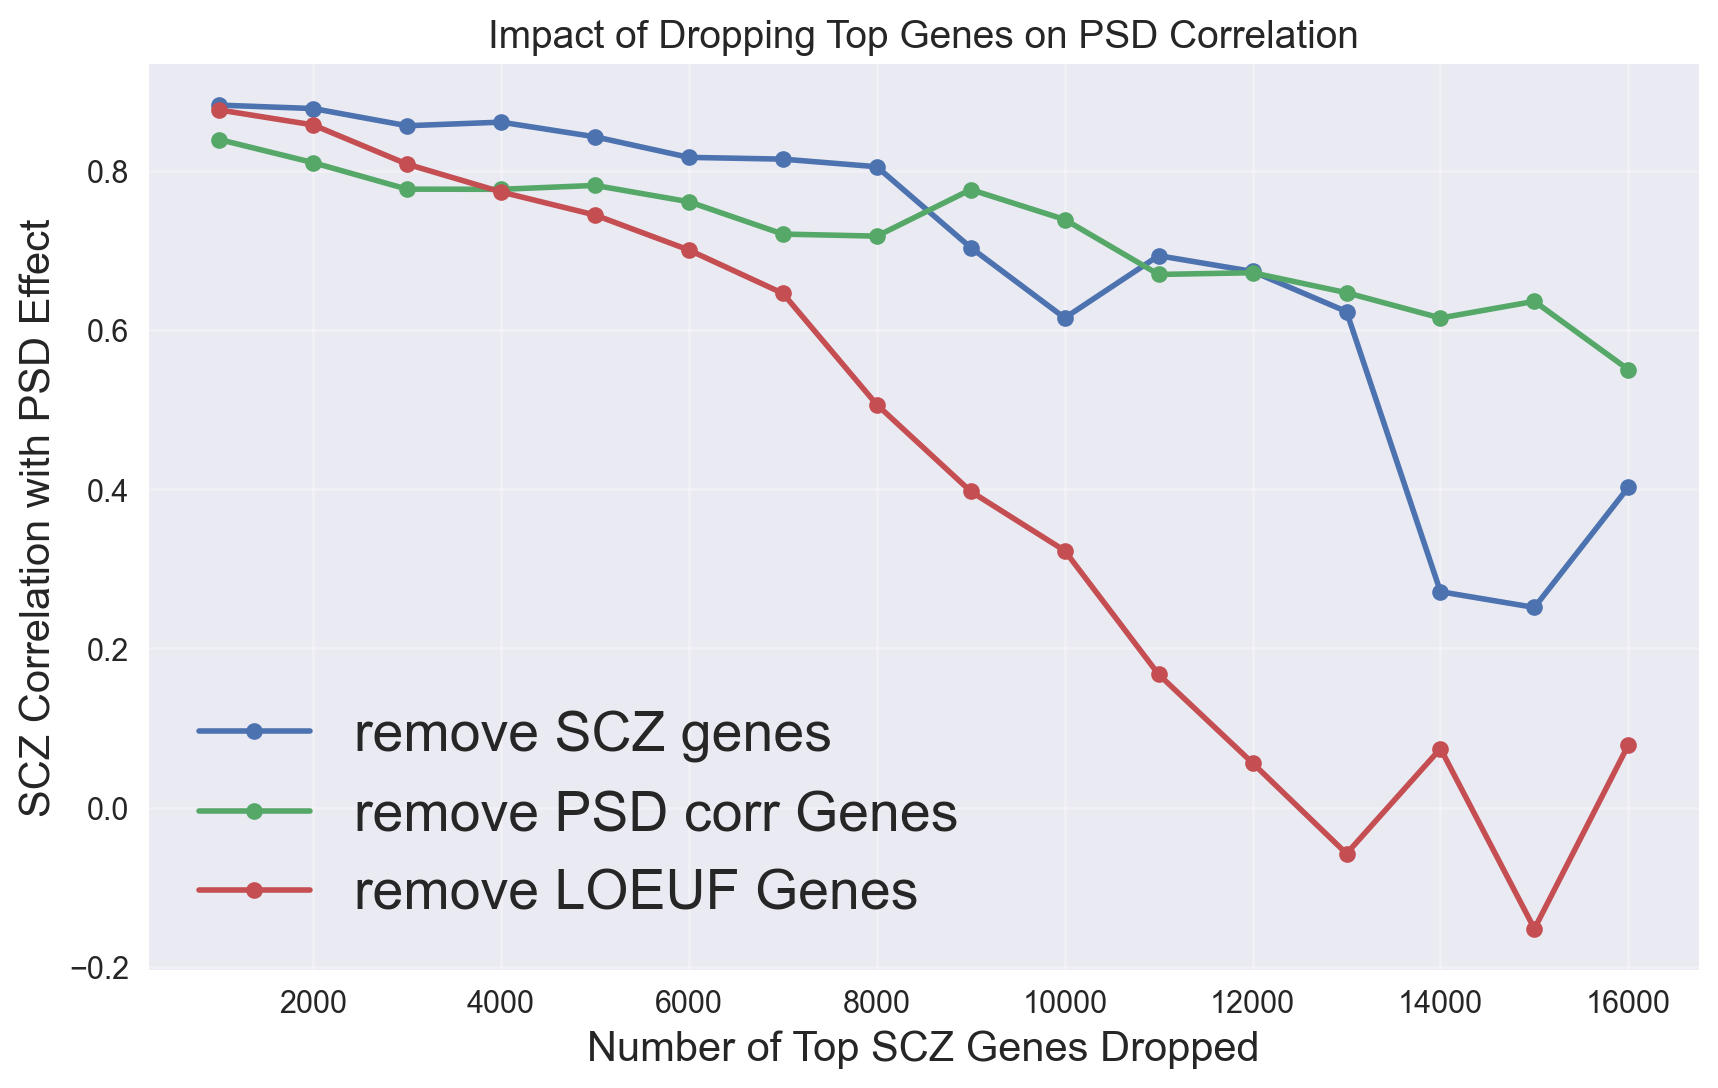

In [90]:
plt.figure(figsize=(10,6), dpi=200)
plt.plot(topN_to_drop, corrs, marker='o', linewidth=2, markersize=6, label="remove SCZ genes")
plt.plot(topN_to_drop, corrs2, marker='o', linewidth=2, markersize=6, label="remove PSD corr Genes")
plt.plot(topN_to_drop, corrs3, marker='o', linewidth=2, markersize=6, label="remove LOEUF Genes")
plt.xlabel('Number of Top SCZ Genes Dropped', fontsize=15)
plt.ylabel('SCZ Correlation with PSD Effect', fontsize=15)
plt.title('Impact of Dropping Top Genes on PSD Correlation', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)

# Load Data

In [155]:
PGC_Trait_Names = ["ASD", "SCZ", "BP", "ADHD", "MDD", "OCD", "TS", "PD", "AN", "EDU", "PTSD"]
DIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GWAS/MagmaGeneRes/"
Psy_GWAS_DF = {}
for Name in PGC_Trait_Names:
    Psy_GWAS_DF[Name] = pd.read_csv(f"{DIR}/{Name}.magma.genes.out.tsv", sep="\t", index_col="GENE")
    Psy_GWAS_DF[Name] = Psy_GWAS_DF[Name].sort_values("ZSTAT", ascending=False)

All_ZSTAT_DF = pd.DataFrame()
for disorder in PGC_Trait_Names:
    All_ZSTAT_DF[disorder] = Psy_GWAS_DF[disorder]["ZSTAT"]
All_ZSTAT_DF = All_ZSTAT_DF.fillna(0)

In [ ]:
with open("/home/jw3514/Work/UNIMED/notebooks/data/Synapse_genes.txt", 'r') as f:
    Synase_Gene = [int(line.strip()) for line in f.readlines()]
Synase_Gene[:2]
All_ZSTAT_DF_ExcludeSynase = All_ZSTAT_DF.copy()
All_ZSTAT_DF_ExcludeSynase = All_ZSTAT_DF_ExcludeSynase.drop(index=Synase_Gene, errors='ignore')
All_ZSTAT_DF_ExcludeSynase

In [157]:
GeneZstat_ExcludeSynase_scaled, GeneZstat_ExcludeSynase_pca, GeneZstat_ExcludeSynase_pca_result, GeneZstat_ExcludeSynase_loadings = perform_pca_analysis(All_ZSTAT_DF_ExcludeSynase)
GeneZstat_ExcludeSynase_pc_scores_df = pd.DataFrame(
    GeneZstat_ExcludeSynase_pca_result,
    index=All_ZSTAT_DF_ExcludeSynase.index, 
    columns=[f'PC{i+1}' for i in range(GeneZstat_ExcludeSynase_pca_result.shape[1])]
)

Explained variance ratios:
PC1: 0.221 (22.1%)
PC2: 0.094 (9.4%)
PC3: 0.092 (9.2%)
PC4: 0.089 (8.9%)
PC5: 0.089 (8.9%)
PC6: 0.083 (8.3%)
PC7: 0.080 (8.0%)
PC8: 0.076 (7.6%)
PC9: 0.067 (6.7%)
PC10: 0.056 (5.6%)
PC11: 0.053 (5.3%)

Cumulative variance explained: 100.0%

PC1 loadings:
MDD     0.452134
SCZ     0.432673
EDU     0.399845
BP      0.379413
AN      0.321877
OCD     0.265767
ADHD    0.264135
ASD     0.172906
TS      0.120100
PTSD    0.110509
PD      0.063261
Name: PC1, dtype: float64


In [159]:
explained_variance_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(GeneZstat_ExcludeSynase_pca.explained_variance_ratio_))],
    'explained_variance_ratio': GeneZstat_ExcludeSynase_pca.explained_variance_ratio_,
    'cumulative_variance_ratio': np.cumsum(GeneZstat_ExcludeSynase_pca.explained_variance_ratio_)
})
output_dir = "/home/jw3514/Work/UNIMED/results/pca/PGC/"
explained_variance_file = os.path.join(output_dir, "MagmaGene_ExcludeSynase_explained_variance_ratio.csv")
explained_variance_df.to_csv(explained_variance_file, index=False)
print(f"Saved explained variance ratios to {explained_variance_file}")

Saved explained variance ratios to /home/jw3514/Work/UNIMED/results/pca/PGC/MagmaGene_ExcludeSynase_explained_variance_ratio.csv


## SCZ

In [11]:
PSD_corrDF = pd.read_csv("/home/jw3514/Work/UNIMED/dat/Pfactor/HumanCT_GenePSD_Correlation.csv", index_col=0)
HumanCT_PSD = pd.read_csv("/home/jw3514/Work/UNIMED/results/goterms/HumanCT_PSD_Spec.csv", index_col=0)
Psy_GWAS_CTBias_DF_Spec = pd.read_csv("/home/jw3514/Work/UNIMED/results/pca/PGC/HumanCT/top_gene_enrich.Empty/combined_bias_data.csv", index_col=0)

In [13]:
Psy_GWAS_CTBias_DF_Spec

,OCD,TS,PD,SCZ,ADHD,EDU,ASD,AN,BP,MDD,PTSD
ct_idx,,,,,,,,,,,
0,-0.016530,0.017559,0.038349,0.180813,0.063425,0.200174,0.063964,0.019685,0.142590,0.079181,0.004748
1,0.001404,-0.005973,0.010080,0.087318,0.010499,0.159380,0.001090,-0.028210,0.082251,0.104810,-0.005912
2,-0.018548,0.028020,-0.004697,0.109787,0.009554,0.139485,0.022666,-0.028898,0.073965,0.046746,-0.004071
3,-0.013172,-0.044312,0.027127,0.115515,0.029397,0.108356,0.006992,0.033355,0.109589,0.070338,-0.001584
4,-0.017245,-0.057951,0.011290,0.045026,0.014838,0.012362,0.016391,0.024936,0.032923,0.034780,0.031947
...,...,...,...,...,...,...,...,...,...,...,...
456,0.002014,0.073078,-0.007685,0.133145,0.078459,0.186446,0.031602,0.044422,0.074025,0.210919,0.036223
457,-0.009726,0.051548,0.007356,0.188114,0.093576,0.182214,0.067637,0.086371,0.115994,0.231138,0.016049
458,-0.011948,0.045219,-0.027516,0.147540,0.104794,0.147378,0.015629,0.054223,0.042433,0.201351,0.031433


In [176]:
topN_to_drop = range(1000, 16000, 1000)
def analyze_disorder_psd_correlation(Disorder, FilePath, topN_to_drop, mode="HumanCT", method="top_gene_enrich"):
    """
    Analyze correlation between disorder and PSD effect after dropping top genes.
    
    Parameters:
    Disorder (str): Name of the disorder (e.g., "SCZ", "ASD")
    FilePath (str): Base path to the results directory
    
    Returns:
    tuple: Three lists of correlations (corrs1, corrs2, corrs3) for DZ, PSD, and LOEUF analyses
    """
    if method == "AvgZ":
        value2_col = "EFFECT"
    else:
        value2_col = "beta"

    values1 = HumanCT_PSD.sort_index()["EFFECT"].values
    values2 = Psy_GWAS_CTBias_DF_Spec.sort_index()[Disorder].values
    RawCorr = stats.spearmanr(values2, values1)[0]

    corrs1 = [RawCorr]
    for N_Genes_Drop in topN_to_drop:
        tmpDF = pd.read_csv(f"{FilePath}/DZ/{mode}/{method}/{Disorder}_DropTop_{N_Genes_Drop}.csv", index_col="ct_idx")
        values1 = HumanCT_PSD.sort_index()["EFFECT"].values
        values2 = tmpDF.sort_index()[value2_col].values
        corr = stats.spearmanr(values2, values1)
        corrs1.append(corr[0])

    corrs2 = [RawCorr]
    for N_Genes_Drop in topN_to_drop:
        tmpDF = pd.read_csv(f"{FilePath}/PSD/{mode}/{method}/{Disorder}_DropTop_{N_Genes_Drop}.csv", index_col="ct_idx")
        values1 = HumanCT_PSD.sort_index()["EFFECT"].values
        values2 = tmpDF.sort_index()[value2_col].values
        corr = stats.spearmanr(values2, values1)
        corrs2.append(corr[0])

    corrs3 = [RawCorr]
    for N_Genes_Drop in topN_to_drop:
        tmpDF = pd.read_csv(f"{FilePath}/LOEUF/{mode}/{method}/{Disorder}_DropTop_{N_Genes_Drop}.csv", index_col="ct_idx")
        values1 = HumanCT_PSD.sort_index()["EFFECT"].values
        values2 = tmpDF.sort_index()[value2_col].values
        corr = stats.spearmanr(values2, values1)
        corrs3.append(corr[0])
    
    return corrs1, corrs2, corrs3

def plot_disorder_psd_correlation(corrs1, corrs2, corrs3, disorder, dpi=80):
    """
    Plot the correlation between disorder and PSD effect after dropping top genes.
    
    Parameters:
    corrs1 (list): Correlations for DZ analysis
    corrs2 (list): Correlations for PSD analysis 
    corrs3 (list): Correlations for LOEUF analysis
    disorder (str): Name of the disorder for labeling
    """
    # Set up the figure with publication-quality parameters
    plt.figure(figsize=(9, 5), dpi=dpi)
    
    # Define publication-quality color palette and styling
    colors = ['#2E86AB', '#A23B72', '#F18F01']  # Professional blue, magenta, orange
    markers = ['o', 's', '^']  # Circle, square, triangle
    linestyles = ['-', '--', '-.']
    
    topN_to_drop_to_plot = np.array([0] + list(topN_to_drop))
    
    # Plot each line with enhanced styling
    plt.plot(topN_to_drop_to_plot, corrs1, 
             color=colors[0], marker=markers[0], linestyle=linestyles[0],
             linewidth=2.5, markersize=8, markeredgewidth=1.5, markeredgecolor='white',
             label=f"Remove top {disorder} genes", alpha=0.9)
    
    plt.plot(topN_to_drop_to_plot, corrs2, 
             color=colors[1], marker=markers[1], linestyle=linestyles[1],
             linewidth=2.5, markersize=8, markeredgewidth=1.5, markeredgecolor='white',
             label="Remove top PSD-correlated genes", alpha=0.9)
    
    plt.plot(topN_to_drop_to_plot, corrs3, 
             color=colors[2], marker=markers[2], linestyle=linestyles[2],
             linewidth=2.5, markersize=8, markeredgewidth=1.5, markeredgecolor='white',
             label="Remove top LOEUF genes", alpha=0.9)
    
    # Enhanced axis labels and title
    plt.xlabel('Number of genes removed', fontsize=16, fontweight='bold')
    plt.ylabel(f'{disorder}–PSD correlation (Spearman ρ)', fontsize=16, fontweight='bold')
    #plt.title(f'Impact of gene removal on {disorder}–PSD correlation', 
    #          fontsize=18, fontweight='bold', pad=20)
    
    # Professional tick styling
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Enhanced grid
    plt.grid(True, alpha=0.3, linewidth=0.8, linestyle='-')
    
    # Professional legend
    plt.legend(fontsize=13, frameon=True, fancybox=True, shadow=True, 
               framealpha=0.9, edgecolor='black', facecolor='white')
    
    # Set axis limits for better visualization
    plt.xlim(-0.02 * max(topN_to_drop_to_plot), 1.02 * max(topN_to_drop_to_plot))
    
    # Add minor ticks
    plt.minorticks_on()
    
    # Improve layout
    plt.tight_layout()
    
    # Remove top and right spines for cleaner look
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


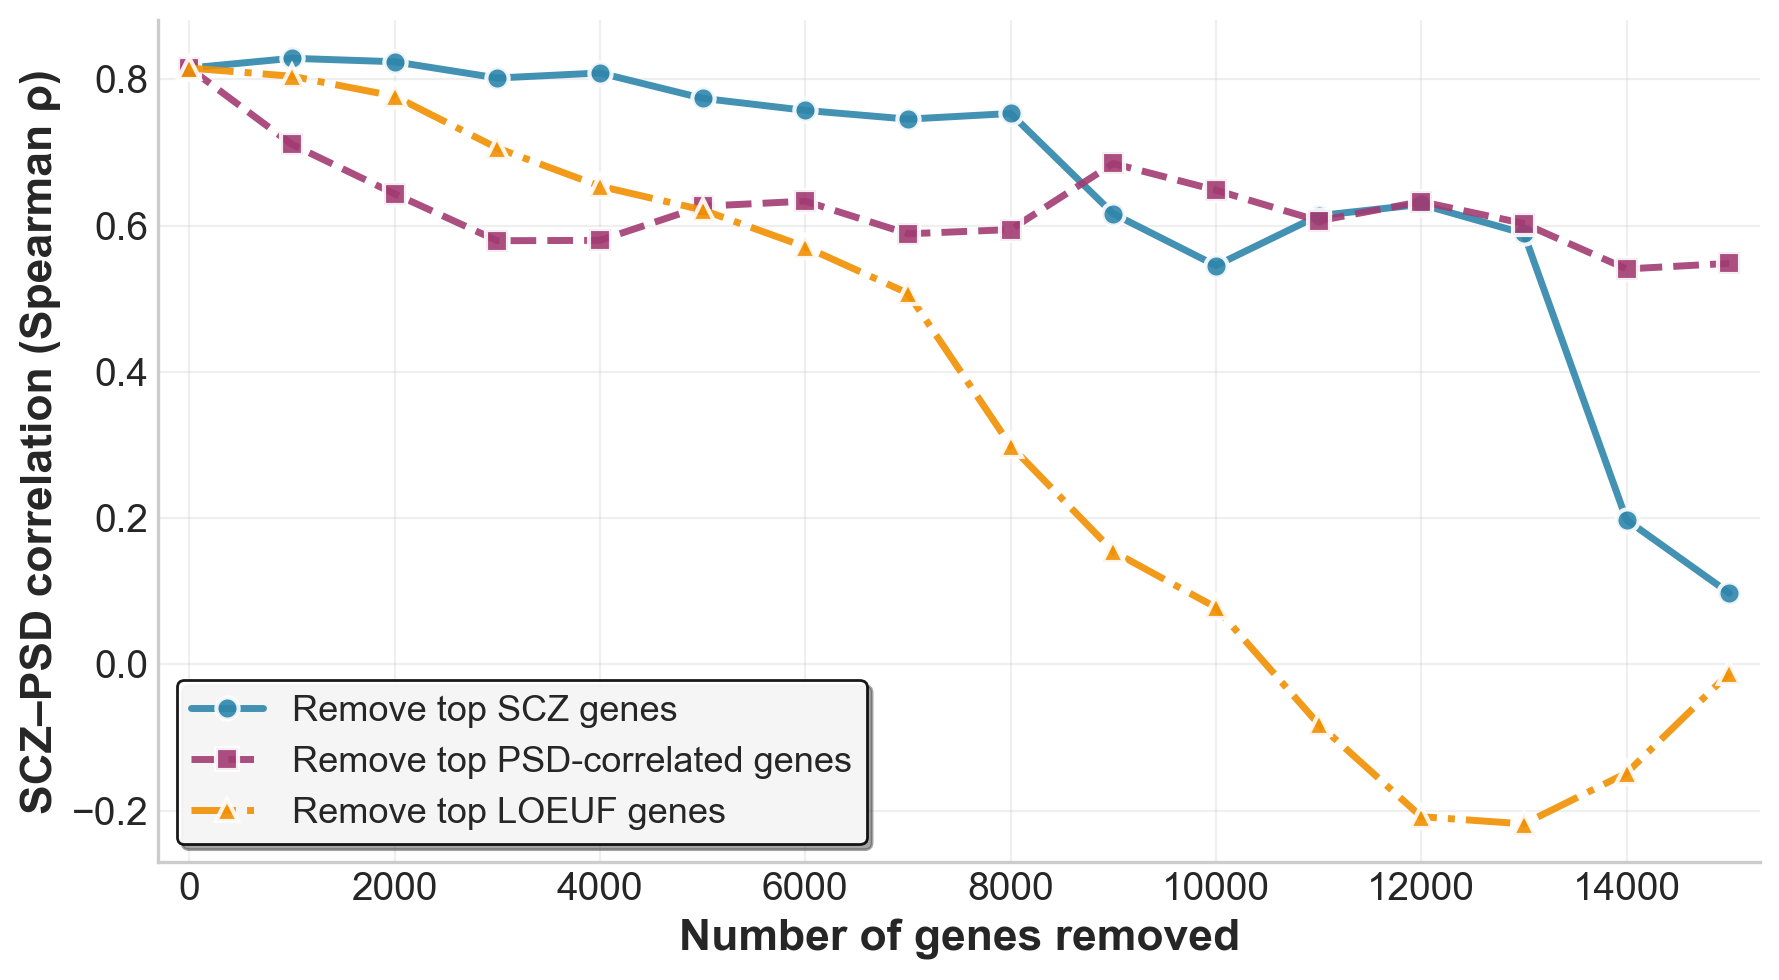

In [177]:
# Example usage
Disorder = "SCZ"
FilePath = "/home/jw3514/Work/UNIMED/results/PanInf_Enhanced/"
corrs1, corrs2, corrs3 = analyze_disorder_psd_correlation(Disorder, FilePath, topN_to_drop, "HumanCT", "top_gene_enrich")
plot_disorder_psd_correlation(corrs1, corrs2, corrs3, Disorder, dpi=200)

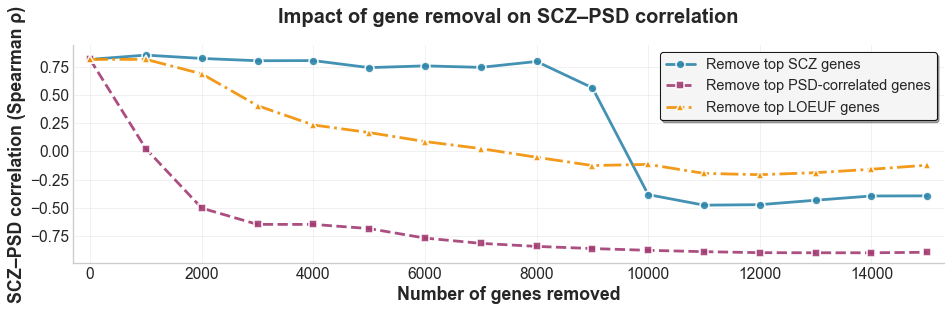

In [164]:
# Example usage
Disorder = "SCZ"
FilePath = "/home/jw3514/Work/UNIMED/results/PanInf_Enhanced/"
corrs1, corrs2, corrs3 = analyze_disorder_psd_correlation(Disorder, FilePath, topN_to_drop, "HumanCT", "AvgZ")
plot_disorder_psd_correlation(corrs1, corrs2, corrs3, Disorder)

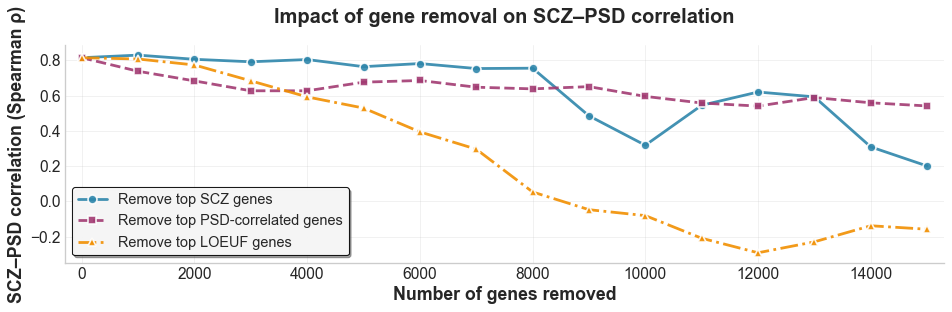

In [165]:
# Example usage
Disorder = "SCZ"
FilePath = "/home/jw3514/Work/UNIMED/results/PanInf_Enhanced/"
corrs1, corrs2, corrs3 = analyze_disorder_psd_correlation(Disorder, FilePath, topN_to_drop, "HumanCT", "CT_Correlation")
plot_disorder_psd_correlation(corrs1, corrs2, corrs3, Disorder)

In [146]:
with open("/home/jw3514/Work/UNIMED/notebooks/data/Synapse_genes.txt", 'r') as f:
    Synase_Gene = [int(line.strip()) for line in f.readlines()]
Synase_Gene[:2]

[22848, 81926]

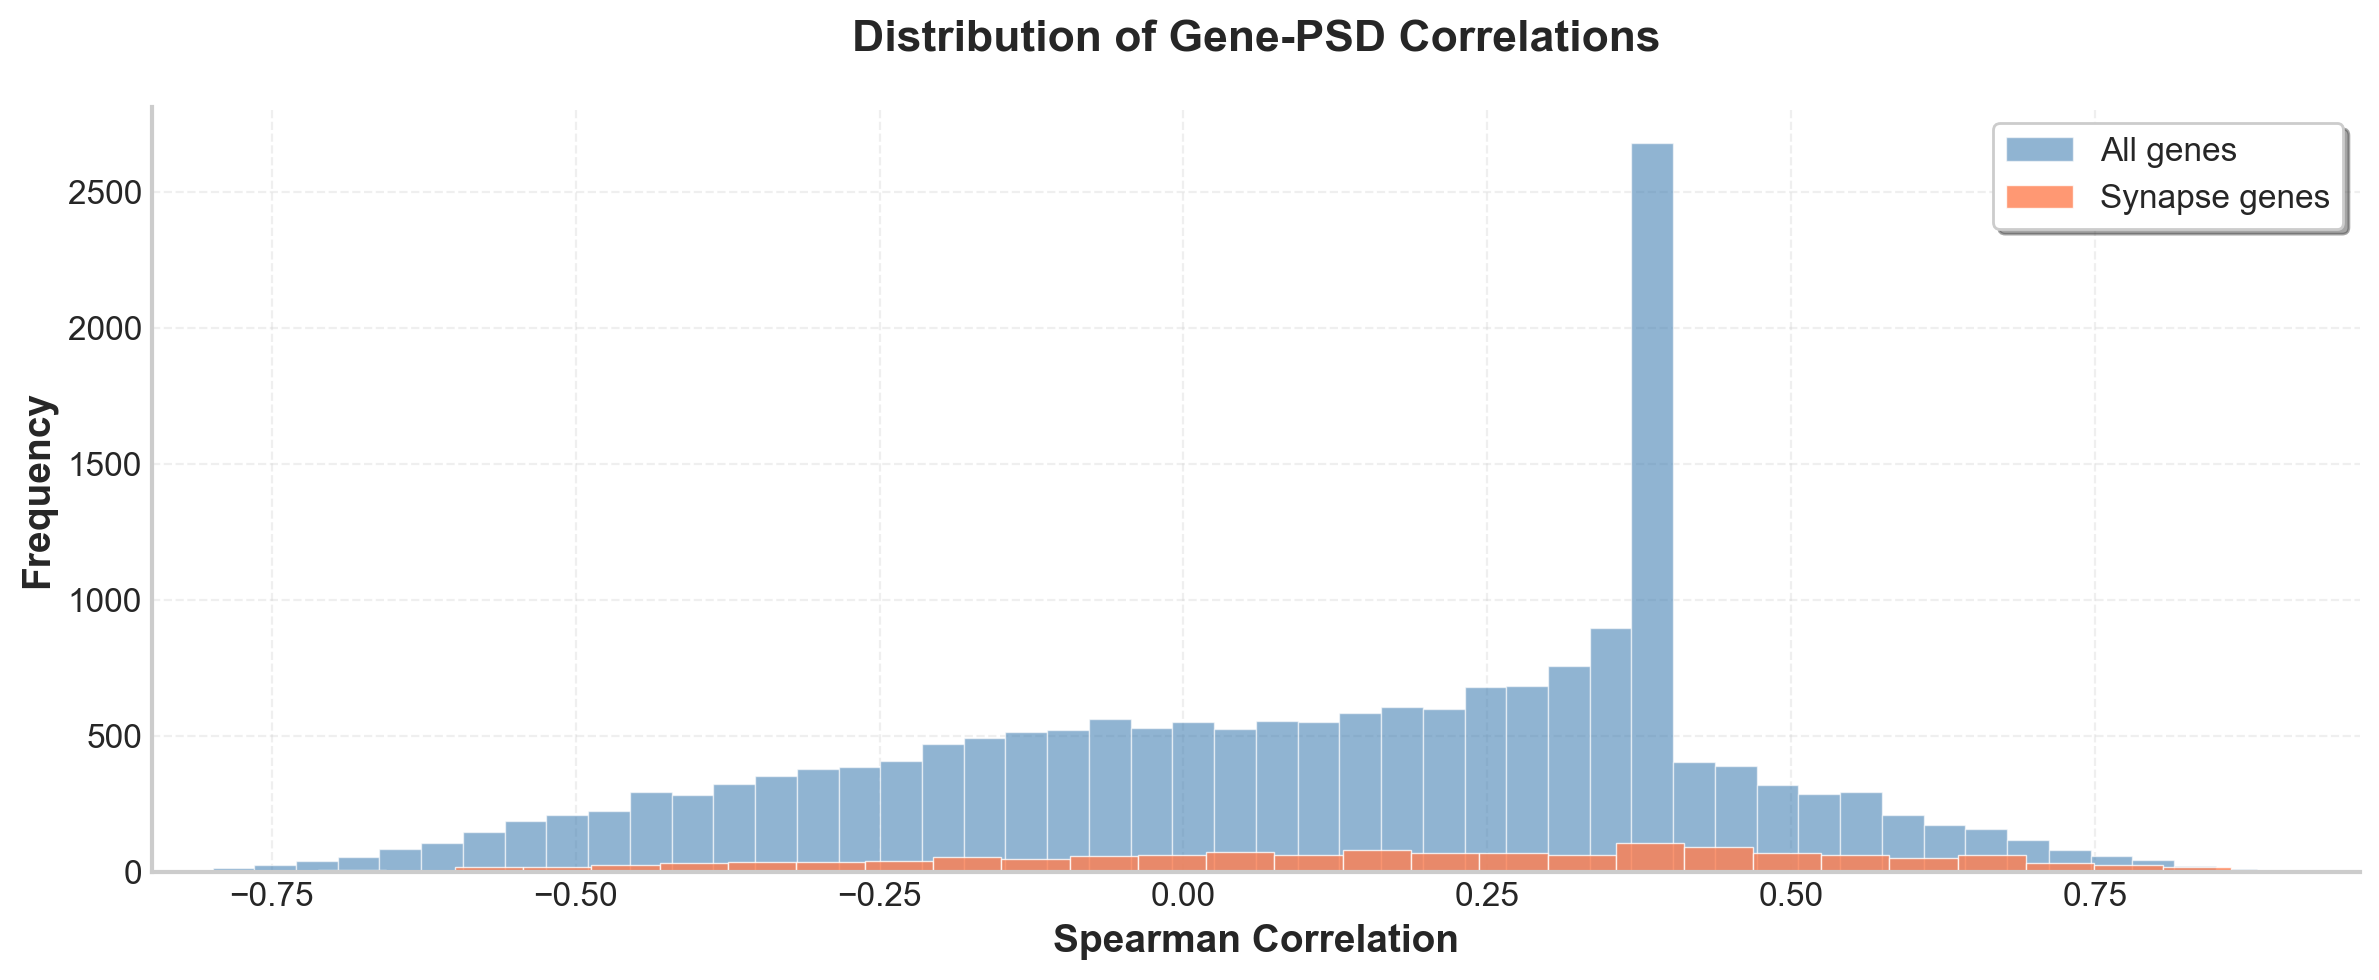

In [173]:
plt.figure(figsize=(12, 5), dpi=200)

# Create histogram for all genes
plt.hist(PSD_corrDF["spearman_corr"], bins=50, alpha=0.6, edgecolor='white', 
         color='steelblue', label='All genes', linewidth=0.5)

# Create histogram for synapse genes
Synase_Gene_valid = [g for g in Synase_Gene if g in PSD_corrDF.index]
PSD_corrDF_syn = PSD_corrDF.loc[Synase_Gene_valid, "spearman_corr"]
plt.hist(PSD_corrDF_syn, bins=30, alpha=0.8, edgecolor='white', 
         color='coral', label='Synapse genes', linewidth=0.5)

# Styling
plt.xlabel('Spearman Correlation', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Gene-PSD Correlations', fontsize=16, fontweight='bold', pad=20)
plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Set axis limits and ticks
plt.xlim(PSD_corrDF["spearman_corr"].min() - 0.05, PSD_corrDF["spearman_corr"].max() + 0.05)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

# What About Other Pathway